*  **Name**:- Avdhut B. Kulkarni
* **PRN**:-  2324001098
* **Roll no.**:- B-58




In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [22]:
img =img_color = cv2.imread('input.jpg')   # BGR image from OpenCV
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)


Text(0.5, 1.0, 'Original Color Image')

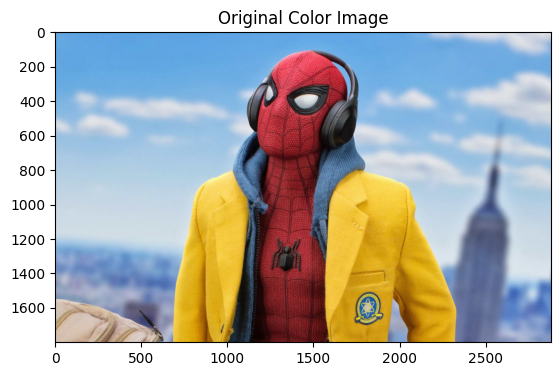

In [23]:
plt.imshow(img_color)
plt.title("Original Color Image")

(np.float64(-0.5), np.float64(2879.5), np.float64(1799.5), np.float64(-0.5))

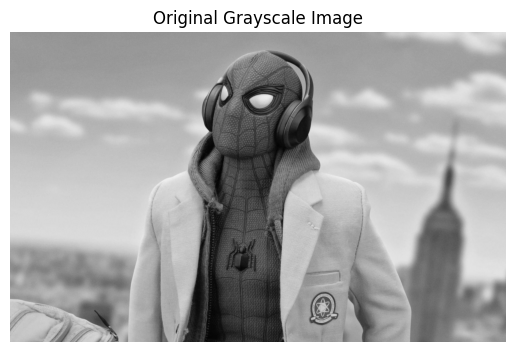

In [33]:

img = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

plt.title("Original Grayscale Image")
plt.axis("off")

In [25]:
height, width = img.shape
total_pixels = img.size   # simpler and equivalent

print("Image Height:", height)
print("Image Width:", width)
print("Total Pixels:", total_pixels)


Image Height: 1800
Image Width: 2880
Total Pixels: 5184000


In [26]:
hist = np.zeros(256, dtype=int)

for pixel in img.flatten():
    hist[pixel] += 1



In [36]:
hist

array([    52,     42,    106,    248,    877,    887,   2960,   2067,
         4755,   3348,   5556,   4391,   5510,   5311,   5967,   5875,
         6240,   6236,   6223,   6995,   6638,   7285,   6835,   6812,
         6735,   6521,   6923,   6860,   7070,   7201,   7268,   7495,
         7401,   7476,   7734,   7724,   8062,   7794,   7999,   8380,
         8251,   8327,   8581,   8621,   8851,   8777,   9271,   9298,
         9403,   9654,   9711,   9785,   9924,  10152,  10362,  10144,
        10398,  10491,  10638,  10764,  10568,  10820,  10872,  11087,
        11010,  10856,  10842,  10904,  10867,  10874,  10784,  10903,
        10818,  10801,  10612,  10659,  10486,  10461,  10358,  10308,
         9927,   9927,   9905,  10065,   9638,   9758,   9893,   9991,
        10061,  10236,  10206,  10631,  10623,  10464,  10632,  10402,
        10536,  10570,  11050,  11623,  12624,  12803,  13637,  14215,
        14472,  14606,  14766,  14591,  14308,  14432,  14707,  14772,
      

In [40]:
pdf = hist / total_pixels



In [41]:
cdf = np.zeros(256)
cdf[0] = pdf[0]

for i in range(1, 256):
    cdf[i] = cdf[i-1] + pdf[i]


In [39]:
new_values = np.zeros(256, dtype=np.uint8)

for i in range(256):
    new_values[i] = round(255 * cdf[i])


new_values

array([  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   2,
         2,   2,   2,   3,   3,   3,   4,   4,   4,   5,   5,   5,   6,
         6,   6,   7,   7,   7,   8,   8,   8,   9,   9,  10,  10,  10,
        11,  11,  12,  12,  12,  13,  13,  14,  14,  15,  15,  16,  16,
        17,  17,  18,  18,  19,  19,  20,  20,  21,  21,  22,  22,  23,
        23,  24,  25,  25,  26,  26,  27,  27,  28,  28,  29,  29,  30,
        30,  31,  31,  32,  32,  33,  33,  34,  34,  35,  35,  36,  36,
        37,  37,  38,  38,  39,  39,  40,  40,  41,  42,  42,  43,  44,
        44,  45,  46,  46,  47,  48,  49,  49,  50,  51,  51,  52,  53,
        53,  54,  54,  55,  56,  56,  57,  57,  58,  58,  59,  59,  60,
        60,  61,  61,  62,  62,  63,  63,  64,  64,  65,  65,  66,  66,
        67,  68,  68,  69,  70,  72,  73,  75,  78,  81,  84,  88,  91,
        95,  98, 102, 105, 109, 112, 115, 118, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 140, 143, 144, 146, 148, 150, 15

In [42]:
enhanced_img = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        enhanced_img[i, j] = new_values[img[i, j]]


enhanced_img


array([[ 98,  91,  84, ..., 254, 254, 254],
       [ 98,  91,  84, ..., 253, 253, 253],
       [ 95,  91,  88, ..., 253, 253, 253],
       ...,
       [186, 183, 181, ...,  73,  72,  70],
       [186, 183, 179, ...,  75,  72,  69],
       [189, 183, 177, ...,  75,  70,  69]], dtype=uint8)

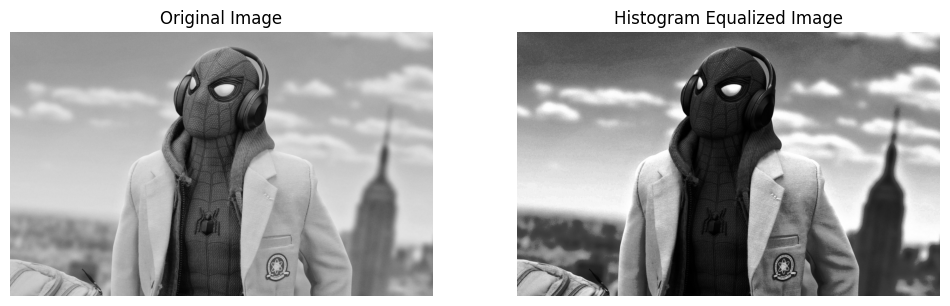

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(enhanced_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.show()


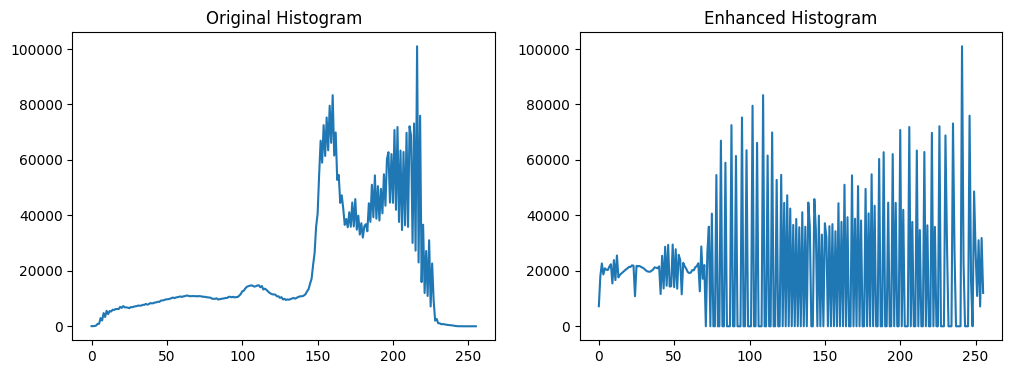

In [32]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist)
plt.title("Original Histogram")

enhanced_hist, _ = np.histogram(enhanced_img.flatten(), 256, [0,256])

plt.subplot(1,2,2)
plt.plot(enhanced_hist)
plt.title("Enhanced Histogram")

plt.show()
